In [24]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [25]:
n_data = torch.ones(100,2)
#print(n_data)

In [26]:
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.LongTensor)

In [27]:
"""
torch.cat(seq, dim=0, out=None)
>>> x = torch.randn(2, 3)
>>> x
tensor([[ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497]])
>>> torch.cat((x, x, x), 0)
tensor([[ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497],
        [ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497],
        [ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497]])
>>> torch.cat((x, x, x), 1)
tensor([[ 0.6580, -1.0969, -0.4614,  0.6580, -1.0969, -0.4614,  0.6580,
         -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497, -0.1034, -0.5790,  0.1497, -0.1034,
         -0.5790,  0.1497]])

For more detial: https://pytorch.org/docs/stable/torch.html
"""

'\ntorch.cat(seq, dim=0, out=None)\n>>> x = torch.randn(2, 3)\n>>> x\ntensor([[ 0.6580, -1.0969, -0.4614],\n        [-0.1034, -0.5790,  0.1497]])\n>>> torch.cat((x, x, x), 0)\ntensor([[ 0.6580, -1.0969, -0.4614],\n        [-0.1034, -0.5790,  0.1497],\n        [ 0.6580, -1.0969, -0.4614],\n        [-0.1034, -0.5790,  0.1497],\n        [ 0.6580, -1.0969, -0.4614],\n        [-0.1034, -0.5790,  0.1497]])\n>>> torch.cat((x, x, x), 1)\ntensor([[ 0.6580, -1.0969, -0.4614,  0.6580, -1.0969, -0.4614,  0.6580,\n         -1.0969, -0.4614],\n        [-0.1034, -0.5790,  0.1497, -0.1034, -0.5790,  0.1497, -0.1034,\n         -0.5790,  0.1497]])\n\nFor more detial: https://pytorch.org/docs/stable/torch.html\n'

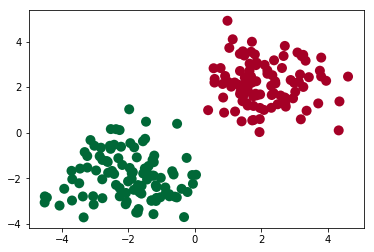

In [28]:
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [29]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [30]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()  # this is for regression mean squared loss

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


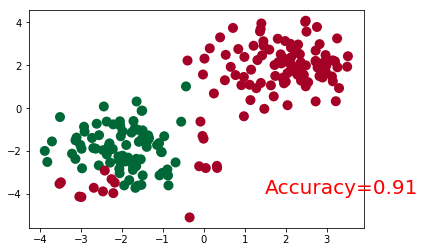

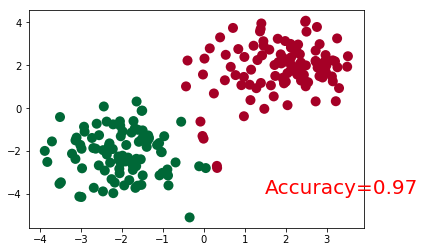

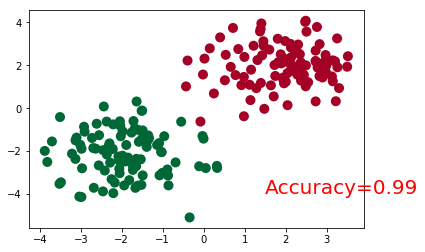

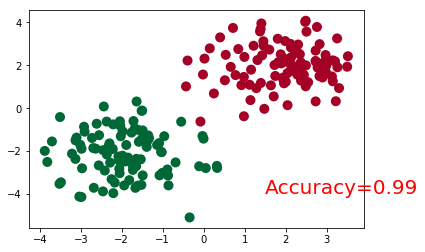

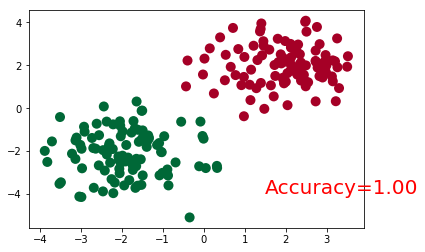

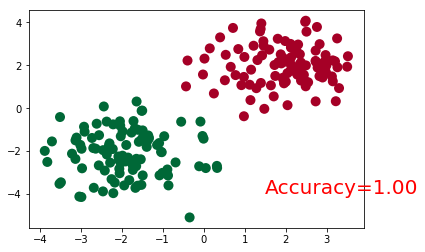

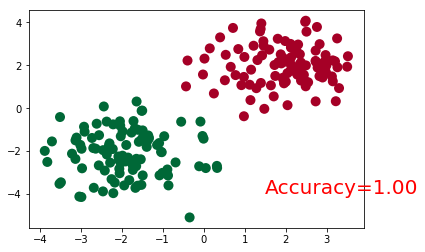

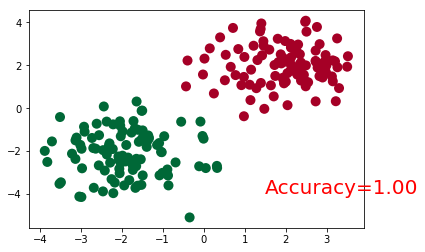

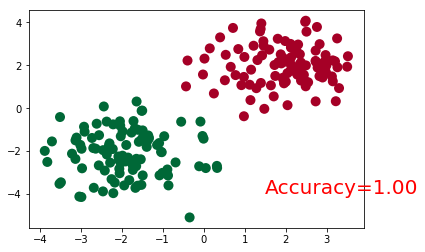

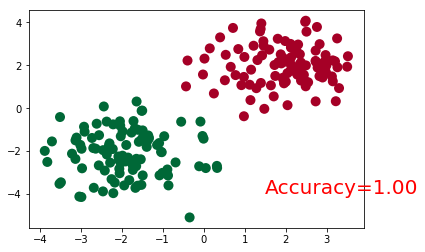

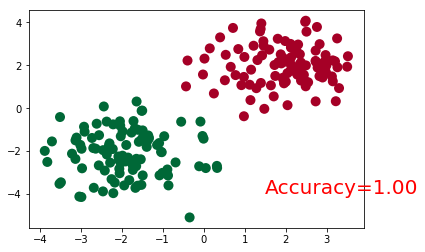

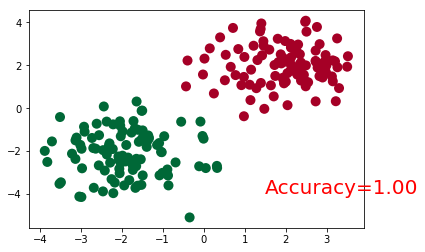

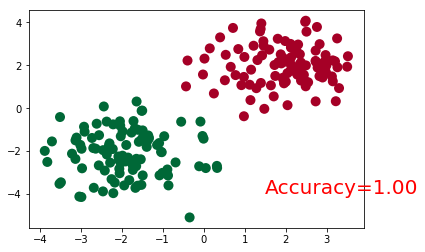

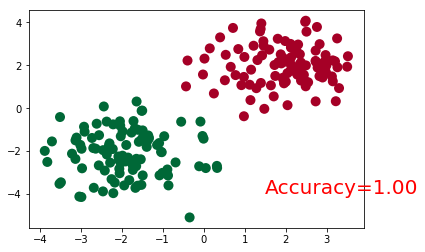

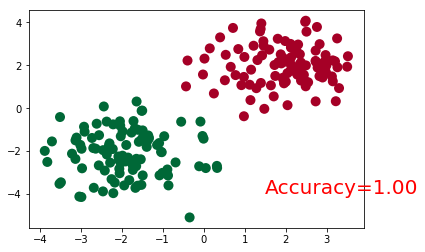

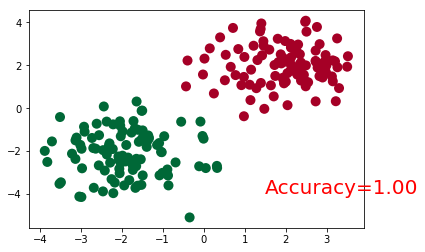

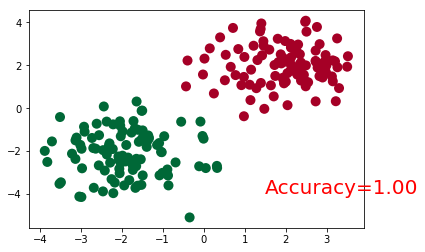

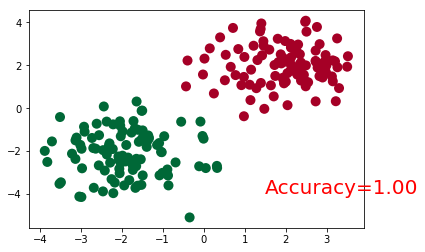

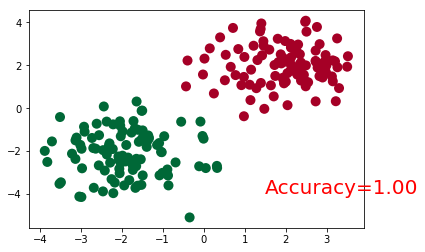

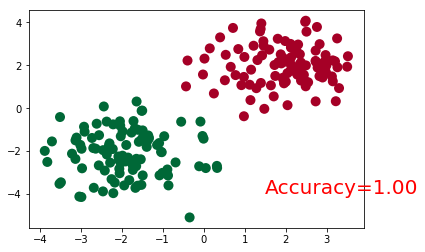

In [23]:
for t in range(200):
    out = net(x)

    loss = loss_func(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
plt.ioff()
